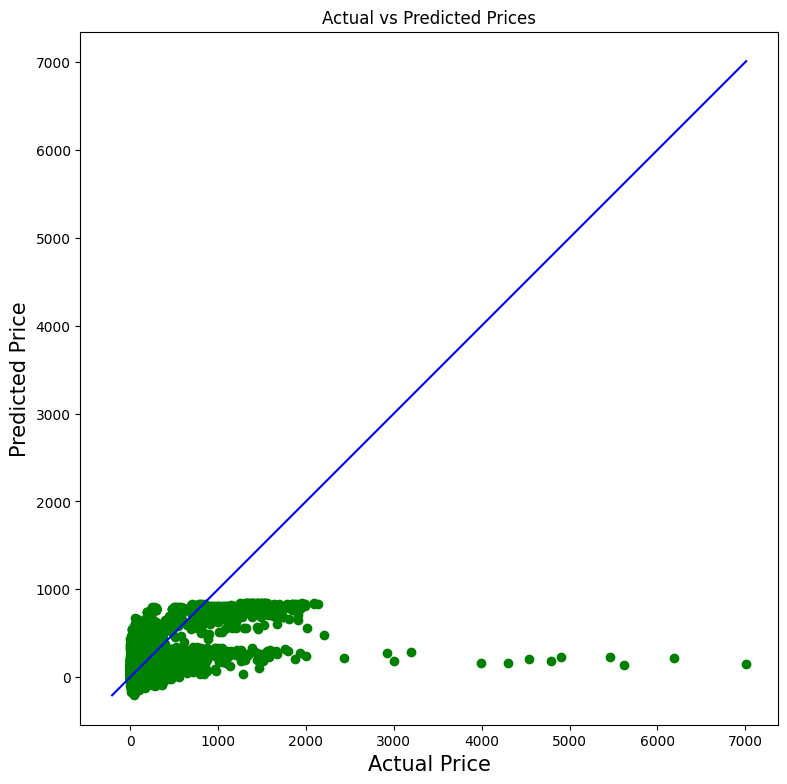

In [40]:
#import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Drop unnecessary columns
train_data.drop(['gift_id', 'stock_update_date'], axis=1, inplace=True)
test_data.drop('gift_id', axis=1, inplace=True)

# Handle missing values
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

# Convert date columns to datetime format
train_data['instock_date'] = pd.to_datetime(train_data['instock_date'])
train_data['uk_date1'] = pd.to_datetime(train_data['uk_date1'])
train_data['uk_date2'] = pd.to_datetime(train_data['uk_date2'])

test_data['instock_date'] = pd.to_datetime(test_data['instock_date'])
test_data['uk_date1'] = pd.to_datetime(test_data['uk_date1'])
test_data['uk_date2'] = pd.to_datetime(test_data['uk_date2'])

# Extract relevant features from datetime columns
datetime_features = ['instock_date', 'uk_date1', 'uk_date2']
for feature in datetime_features:
    train_data[feature + '_year'] = train_data[feature].dt.year
    train_data[feature + '_month'] = train_data[feature].dt.month
    train_data[feature + '_day'] = train_data[feature].dt.day
    train_data[feature + '_hour'] = train_data[feature].dt.hour
    train_data[feature + '_minute'] = train_data[feature].dt.minute
    train_data[feature + '_second'] = train_data[feature].dt.second

    test_data[feature + '_year'] = test_data[feature].dt.year
    test_data[feature + '_month'] = test_data[feature].dt.month
    test_data[feature + '_day'] = test_data[feature].dt.day
    test_data[feature + '_hour'] = test_data[feature].dt.hour
    test_data[feature + '_minute'] = test_data[feature].dt.minute
    test_data[feature + '_second'] = test_data[feature].dt.second

# Drop the original datetime columns
train_data.drop(datetime_features, axis=1, inplace=True)
test_data.drop(datetime_features, axis=1, inplace=True)

# Model training
X = train_data.drop('price', axis=1)
y = train_data['price']

model = LinearRegression()
model.fit(X, y)

# Model evaluation
X_test = test_data[X.columns]  # Select only the columns present in X_train
y_pred = model.predict(X_test)

# Generate submission file
submission = pd.DataFrame({'gift_id': test_data.index, 'price': y_pred})
submission.to_csv('submission.csv', index=False)

# Generate scatter plot

plt.figure(figsize=(9,9))
plt.scatter(y, model.predict(X), c='green')
p1 = max(max(model.predict(X)), max(y))
p2 = min(min(model.predict(X)), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.title('Actual vs Predicted Prices')
plt.axis('equal')
plt.show()